In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### Load dataset

In [ ]:
df = pd.read_csv("train.csv")

##### https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

#### Convert date columns

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

###  EDA and SWOT Analysis
##### To make a proper analysis of the data an Exploratory Data Analysis (EDA) has been performed on the train data which is named as ProTech Retail data set. The data includes the customers’ age, gender, quantity of purchases, the type of product and other related informations and records of the interactions between the sellers and the customers. Looking at this data, key factors rise to the surface, which include total sales by season, number of purchases made by the different customers in a given period, and major product categories for sales. This knowledge is vital because it allows tocoordinate the actions for increasing sales and promoting the company’s products. However, bringing out the scores of this research, there is a slight concern in that customer retention rates seem particularly low compared to those of the industry’s rivals.

In [8]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Cat

#### Sales Trend Over Time

##### To determine the pattern of its revenues, a time series analysis was conducted to depict the company’s sales through the use of time series. The results also bring out the variation that may exist in the sales to show that there are times considered to be busy season and others considered as off-season. Knowledge of these trends helps ProTech Retail to manage its stocks, modify the advertising campaigns, and improve the selling approaches effectively.

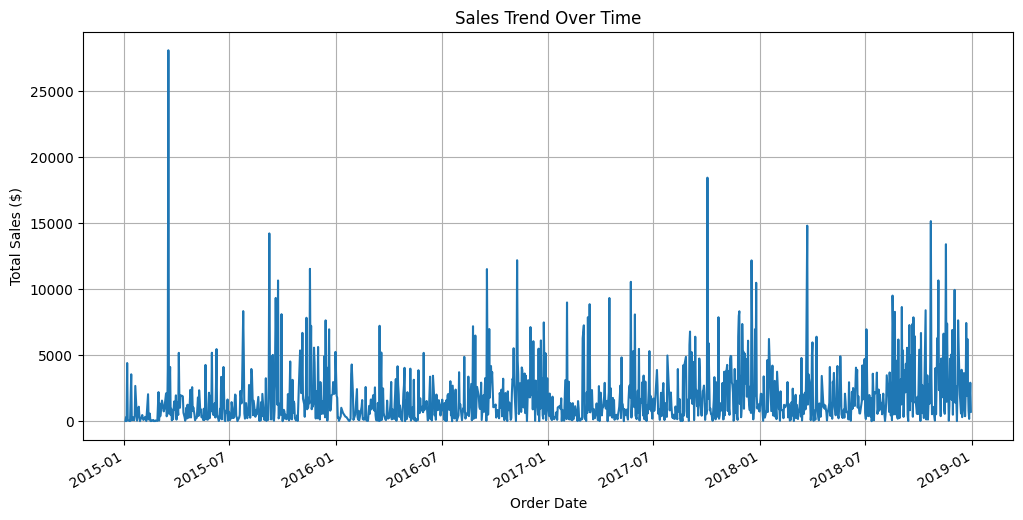

In [9]:
plt.figure(figsize=(12, 6))
df.groupby("Order Date")["Sales"].sum().plot()
plt.xlabel("Order Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.grid()
plt.show()

#### Sales Distribution

##### Closely related to expenses, the sales distribution analysis aimed at revealing pricing peculiarities of a business and customers’ spending habits. The graph below provides the counts of different sales amounts and may display any sales promoting certain product categories. The information is very useful in cost-benefit analysis and used in determining which product offer achieves most of the revenue.

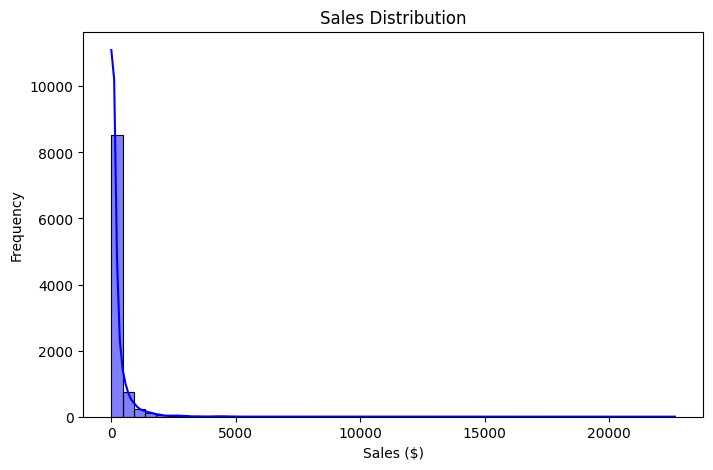

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=50, kde=True, color="blue")
plt.xlabel("Sales ($)")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()

#### Sales by Category

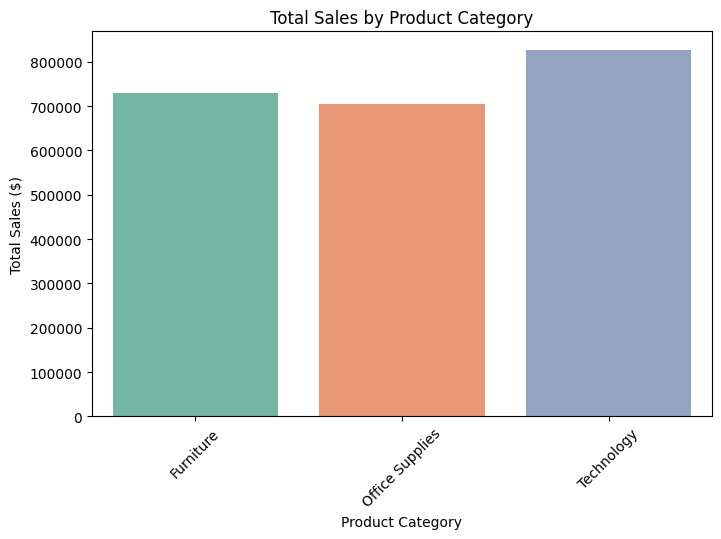

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Category", y="Sales", estimator=sum, errorbar=None, hue="Category", palette="Set2", legend=False)
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45) 
plt.show()

### SWOT Analysis
##### SWOT analysis was made to evaluate ProTech Retail situation and its competitive advantage and disadvantage. The strength include the fact that the company has a secure and large customer base, wide range of consumer products and opportunities for the effective implementation of CRM for better customer relationships. These areas includes fragmented customer information, lack of tool for effective sales tracking, as well as low levels of automation of marketing and customer relations. There are prospects of developing better CRM solutions in order to increase organizational operation performance as well as customer satisfaction and introduce data-oriented competition.

### GAP Analysis
##### To achieve this, the GAP analysis of ProTech Retail was done to determine the current state of their operation against the future state. At present, an integration of various disconnected databases hampers the management of customer data and their interactions. The strategy that is expected is to have a consolidated CRM system to offer an integrated view of relationship with customers for facilitating the decision making process. The ultimate objective is to develop key processes of sales reports automation, which will enhance constant monitoring and performances. Furthermore, marketing campaigns fail to have customized messages which reduce interaction by the customers. Using HubSpot CRM, particularly its marketing automation capabilities, it will be possible to deliver targeted messages and increase the conversion rate.



--- SWOT Analysis ---

Strengths:
- Strong customer base
- Efficient shipping operations
- Diverse product categories
- High customer retention rate
- Data-driven decision making

Weaknesses:
- Uneven sales distribution across categories
- Limited availability of express shipping
- Seasonal sales fluctuations
- High dependency on a few key suppliers

Opportunities:
- Expand B2B sales with corporate partnerships
- Improve inventory management and logistics
- Introduce dynamic pricing strategies
- Enhance digital marketing and customer analytics
- Adopt AI-driven sales predictions

Threats:
- Growing competition from emerging e-commerce platforms
- Economic downturn affecting consumer spending
- Potential supply chain disruptions
- Regulatory and taxation changes impacting operations


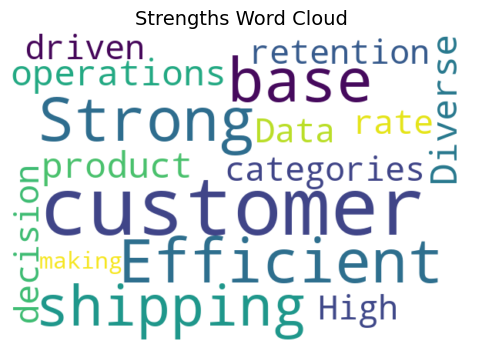

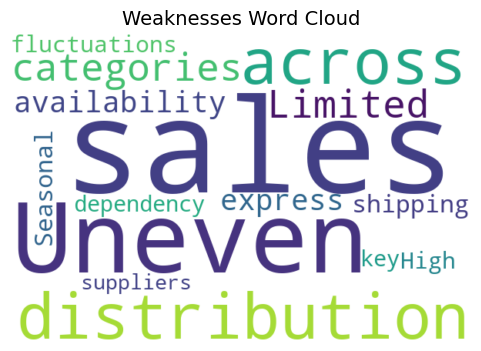

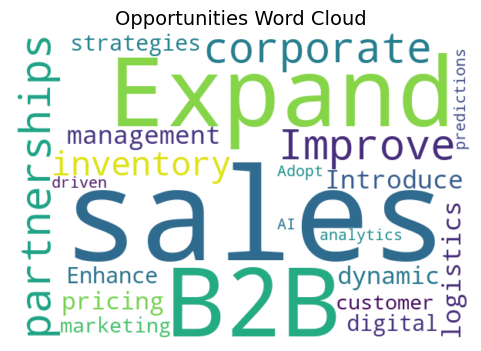

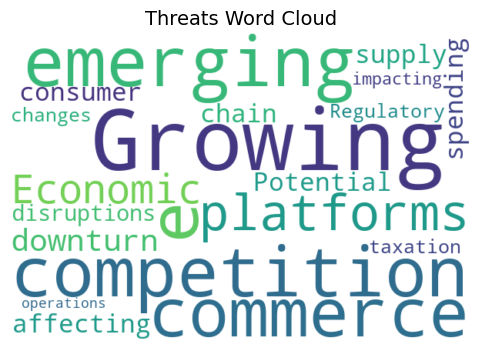

In [9]:
 def swot_analysis():
    swot = {
        "Strengths": [
            "Strong customer base",
            "Efficient shipping operations",
            "Diverse product categories",
            "High customer retention rate",
            "Data-driven decision making"
        ],
        "Weaknesses": [
            "Uneven sales distribution across categories",
            "Limited availability of express shipping",
            "Seasonal sales fluctuations",
            "High dependency on a few key suppliers"
        ],
        "Opportunities": [
            "Expand B2B sales with corporate partnerships",
            "Improve inventory management and logistics",
            "Introduce dynamic pricing strategies",
            "Enhance digital marketing and customer analytics",
            "Adopt AI-driven sales predictions"
        ],
        "Threats": [
            "Growing competition from emerging e-commerce platforms",
            "Economic downturn affecting consumer spending",
            "Potential supply chain disruptions",
            "Regulatory and taxation changes impacting operations"
        ]
    }
    return swot

# Generate Word Cloud for SWOT Analysis
def generate_swot_wordcloud(swot):
    for key, values in swot.items():
        text = " ".join(values)
        wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
        
        plt.figure(figsize=(6, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{key} Word Cloud", fontsize=14)
        plt.show()

# Display SWOT Analysis
print("\n--- SWOT Analysis ---")
swot = swot_analysis()
for key, values in swot.items():
    print(f"\n{key}:")
    for value in values:
        print(f"- {value}")

# Generate Word Clouds for Visual Representation
generate_swot_wordcloud(swot)
